In [ ]:
%%capture
!pip install geopandas

In [ ]:
%%capture
!wget -N https://www.dropbox.com/s/k1abr4wa3ufryc6/Diplomado%20Geopandas.zip
!unzip -o "Diplomado Geopandas.zip"
!unzip -o Paises_Mundo.zip
!unzip -o division_comunal.zip

In [ ]:
import geopandas
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 10]
mundo = geopandas.read_file("Paises_Mundo.shp")
mundo.head(5)

,PAÍS,geometry
0,Aruba (Paises Bajos),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua y Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afganistán,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Argelia,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaiyán,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


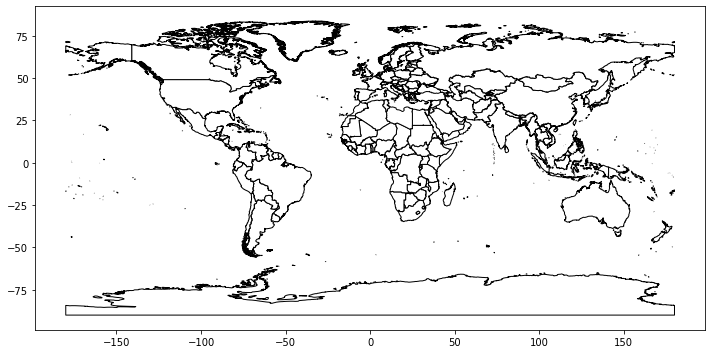

In [ ]:
mundo.plot(color='white', edgecolor='black')
plt.show()

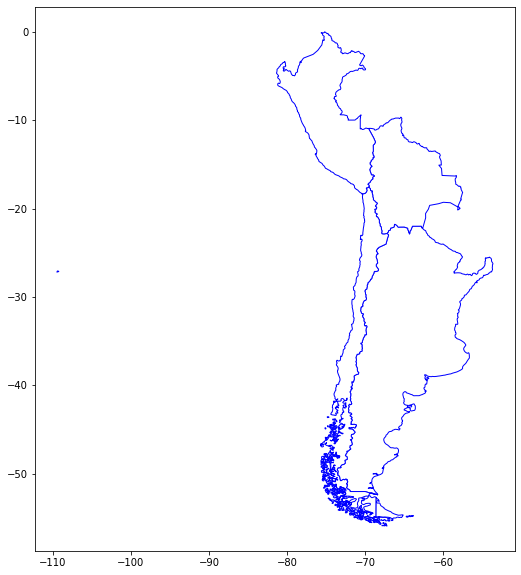

In [ ]:
mundo[mundo["PAÍS"].isin(["Chile", "Perú", "Argentina", "Bolivia"])].plot(color='white', edgecolor='blue')
plt.show()

In [ ]:
mundo[mundo["PAÍS"].isin(["Chile", "Perú", "Argentina", "Bolivia"])]

,PAÍS,geometry,cantidad
10,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...",0
24,Bolivia,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5...",0
42,Chile,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494...",0
172,Perú,"POLYGON ((-69.56750 -10.95056, -69.56844 -10.9...",0


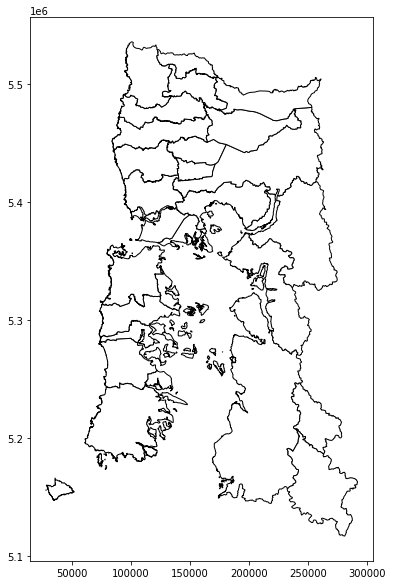

In [ ]:
chile = geopandas.read_file("division_comunal.shp")
lagos = chile[chile.NOM_REG == "Región de Los Lagos"]
lagos.plot(color='white', edgecolor='black')
plt.show()

In [ ]:
import pandas as pd

censo = pd.read_csv("DatasetCenso.csv", sep=";")
mundo = geopandas.read_file("Paises_Mundo.shp")

paises_descendencia = censo[["pais", "descendencia"]].groupby("pais").sum().descendencia.to_dict()

def buscar(fila):
    pais = fila["PAÍS"]
    if pais in paises_descendencia:
        return paises_descendencia[pais]
    return 0

mundo["cantidad"] = mundo.apply(buscar, axis=1)
censo.head()

,comuna,parentesco,edad,pais,a_llegada,n_educacional,descendencia
0,Putre,Esposo/a o cónyuge,54,Italia,2007,9,0
1,Putre,Persona en vivienda colectiva,26,Alemania,2017,9,0
2,Putre,Esposo/a o cónyuge,34,México,1999,3,4
3,Putre,Jefe/a de hogar,32,México,2011,6,1
4,Putre,Jefe/a de hogar,71,Estados Unidos de América,9999,9,99


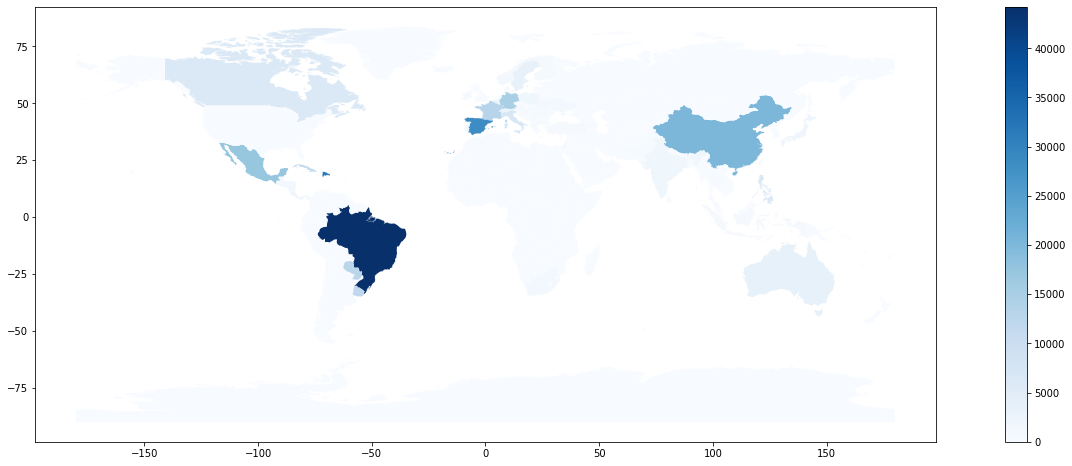

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 8))
ax = mundo.plot(ax=ax,column="cantidad", cmap='Blues', legend=True, categorical=False)
plt.show()

In [ ]:
lagos_copy = lagos.copy()

censo = pd.read_csv("DatasetCenso.csv", sep=";")
comunas = censo.groupby(["comuna", "pais"]).size().reset_index()
comuna_maxpais = comunas.loc[comunas.groupby(["comuna"])[0].idxmax()].set_index("comuna").pais.to_dict()


def buscar(fila):
    comuna = fila["NOM_COM"]
    if comuna in comuna_maxpais:
        return comuna_maxpais[comuna]
    return "No se sabe"

lagos_copy["pais predominante"] = lagos_copy.apply(buscar, axis=1)

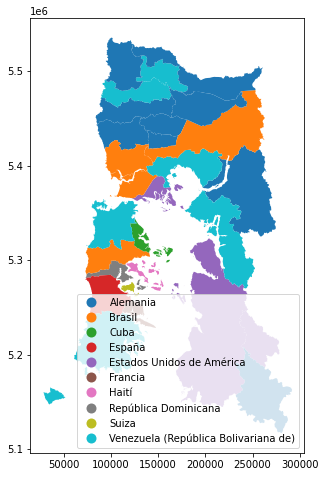

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 8))
ax = lagos_copy.plot(ax=ax,column="pais predominante", legend=True, categorical=True, legend_kwds = {"loc": "lower right", "fancybox": "True"})
plt.show()

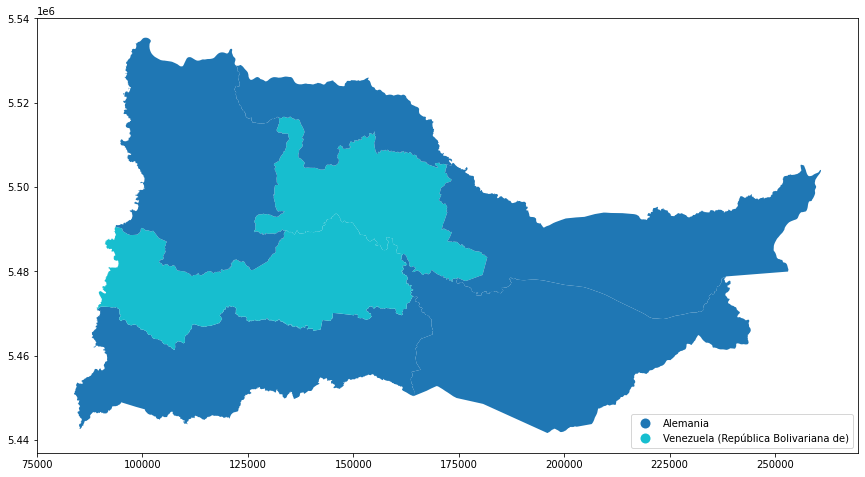

In [ ]:
osorno = lagos_copy[lagos_copy.NOM_PROV == "Osorno"]

f, ax = plt.subplots(1, figsize=(25, 8))
ax = osorno.plot(ax=ax,column="pais predominante", legend=True, categorical=True, legend_kwds = {"loc": "lower right", "fancybox": "True"})
plt.show()